***Constraint Satisfaction Problem (CSP)***

* Constraint satisfaction is a technique where a problem is solved when its values satisfy certain constraints or rules of the problem.

* Constraint satisfaction depends on three components, namely: 
* X: It is a set of variables. 
* D: It is a set of domains where the variables reside. There is a specific domain for each variable.
* C: It is a set of constraints which are followed by the set of variables.

* In constraint satisfaction, domains are the spaces where the variables reside, following the problem specific constraints.
* These are the three main elements of a constraint satisfaction technique.
* The constraint value consists of a pair of {scope, rel}. The scope is a tuple of variables which participate in the constraint and rel is a relation which includes a list of values which the variables can take to satisfy the constraints of the problem.

**Solving Constraint Satisfaction Problems**
* The requirements to solve a constraint satisfaction problem (CSP) is:
* A state-space
* The notion of the solution.
* A state in state-space is defined by assigning values to some or all variables such as {X1=v1, X2=v2, and so on…}.

**An assignment of values to a variable can be done in three ways:**
* **Consistent or Legal Assignment**: An assignment which does not violate any constraint or rule is called Consistent or legal assignment.
* **Complete Assignment**: An assignment where every variable is assigned with a value, and the solution to the CSP remains consistent. Such assignment is known as Complete assignment.
* **Partial Assignment**: An assignment which assigns values to some of the variables only. Such type of assignments are called Partial assignments.

**Types of Domains in CSP**

**There are following two types of domains which are used by the variables :**
* Discrete Domain: It is an infinite domain which can have one state for multiple variables. For example, a start state can be allocated infinite times for each variable.
* Finite Domain: It is a finite domain which can have continuous states describing one domain for one specific variable. It is also called a continuous domain.

**Constraint Types in CSP**

With respect to the variables, basically there are following types of constraints:
* Unary Constraints: It is the simplest type of constraints that restricts the value of a single variable.
* Binary Constraints: It is the constraint type which relates two variables. A value x2 will contain a value which lies between x1 and x3.
* Global Constraints: It is the constraint type which involves an arbitrary number of variables.

**Constraint Propagation**

In local state-spaces, the choice is only one, i.e., to search for a solution. But in CSP, we have two choices either:
1) We can search for a solution or
2) We can perform a special type of inference called **constraint propagation**.

Constraint propagation is a special type of inference which helps in reducing the legal number of values for the variables. The idea behind constraint propagation is **local consistency**. In local consistency, variables are treated as **nodes**, and each binary constraint is treated as an arc in the given problem. There are following local consistencies which are discussed below:
* Node Consistency: A single variable is said to be node consistent if all the values in the variable’s domain satisfy the unary constraints on the variables.
* Arc Consistency: A variable is arc consistent if every value in its domain satisfies the binary constraints of the variables.
* Path Consistency: When the evaluation of a set of two variable with respect to a third variable can be extended over another variable, satisfying all the binary constraints. It is similar to arc consistency.
* k-consistency: This type of consistency is used to define the notion of stronger forms of propagation. Here, we examine the k-consistency of the variables.

*Activity 1:*
* Imagine you have a map of Australia that you want to color by state/territory (which we’ll collectively call “regions”). No two adjacent regions should share a color. Can you color the regions with only three different colors?

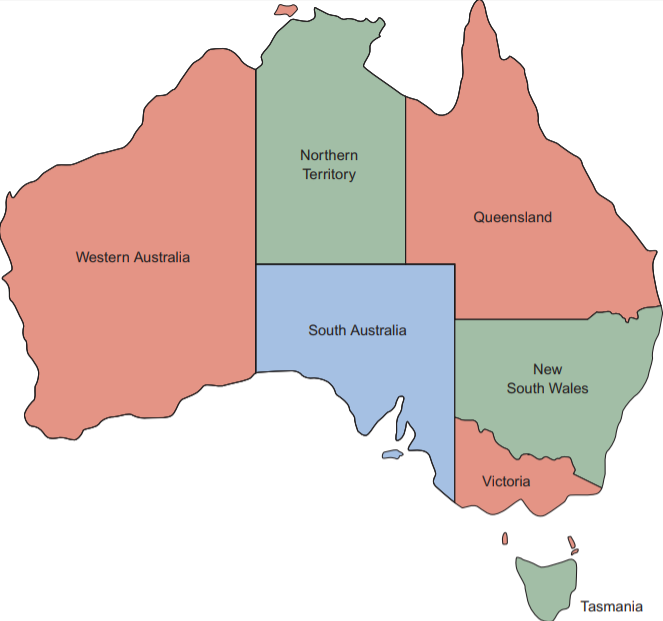

To model the problem as a CSP, we need to define the variables, domains, and constraints. The variables are the seven regions of Australia (at least the seven that we’ll restrict ourselves to): Western Australia; Northern Territory; South Australia; Queensland; New South Wales; Victoria; and Tasmania. In our CSP, they can be modeled with strings. The domain of each variable is the three different colors that can possibly be assigned (we’ll use red, green, and blue). The constraints are the tricky part. No two adjacent regions can be colored with the same color, and our constraints are dependent on which regions border one another. We can use binary constraints (constraints between two variables). Every two regions that share a border also share a binary constraint indicating they can’t be assigned the same color.

***Abstract Constraint Base Class***

In [1]:
from typing import Dict, List, Optional, Generic, TypeVar
from abc import ABC, abstractmethod  # Used to define abstract base classes

# Declare generic type variables: V for variables, D for domain values
# V and D are placeholders for any type we want to use in the CSP 
V = TypeVar('V')  # Example: a region like "Victoria"
D = TypeVar('D')  # Example: a color like "red"

# Define an abstract class that all specific constraints must inherit from
# Inherits from Generic[V, D]: So we can use Constraint[str, int], Constraint[str, str], etc
class Constraint(Generic[V, D], ABC):       # Is a generic class parameterized by V and D
    
    # A list of variables (generic type V) that this constraint will apply to, and return none.
    def __init__(self, variables: List[V]) -> None:     
        # Store the variables that this constraint is concerned with
        self.variables = variables

    @abstractmethod
    def satisfied(self, assignment: Dict[V, D]) -> bool:
        # A dictionary mapping variables to assigned values, and must return a boolean (true/false) value
        # It checks whether the constraint is satisfied given the current assignment
        # This method must be implemented by any subclass
        pass


***Generic CSP Class (Solver)***

In [2]:
# Create a generic CSP class that holds variables, domains, constraints, and solving logic
class CSP(Generic[V, D]):
    # The constructor takes a list of variables and a dictionary of domains
    # The dictionary maps each variable to a list of possible values (its domain) and returns none 
    def __init__(self, variables: List[V], domains: Dict[V, List[D]]) -> None:
        # Variables represent the items we want to assign values to
        self.variables = variables

        # Domains define the possible values each variable can take (e.g., colors)
        self.domains = domains

        # declares and initializes an empty dictionary to store the constraints on each variable.
        # For each variable V, we will store a list of constraints of type Constraint[V, D]
        self.constraints: Dict[V, List[Constraint[V, D]]] = {}

        # Initialize the constraints dictionary with empty lists for each variable
        for variable in self.variables:
            self.constraints[variable] = []

    # forexample:
    # csp = CSP( variables=["WA", "NT"], domains={ "WA": ["red", "green"], "NT": ["green", "blue"] } )
    # The internal structure will be: self.variables → ["WA", "NT"]
    # self.domains → {"WA": ["red", "green"], "NT": ["green", "blue"]}
    # self.constraints → {"WA": [], "NT": []} initially


    # Accepts any constraint using variables of type V and values of type D
    # pass an instance of a class that inherits from the abstract base class Constraint
    def add_constraint(self, constraint: Constraint[V, D]) -> None:
        # Add the constraint to all variables it involves
        for variable in constraint.variables:
            if variable not in self.variables:
                # Error if we try to add a constraint on a variable we didn't define
                raise ValueError(f"Variable {variable} not in CSP")
            # Append the constraint to the list of constraints for each variable
            self.constraints[variable].append(constraint)


    # pass variable and dictionary representing the current state of variable assignments
    def consistent(self, variable: V, assignment: Dict[V, D]) -> bool:
        # Check whether the assignment so far is consistent with all constraints
        return all(constraint.satisfied(assignment) for constraint in self.constraints[variable])
        # self.constraints[variable] looks up the list of constraints associated with the given variable.
        # loop runs the satisfied() method for each constraint that involves variable.
        # The all() function checks if all constraints are satisfied for the current assignment


    # pass dictionary that maps variables (V) to their assigned values (D). It starts as an empty dictionary by default
    # If a solution is found: returns a full assignment
    def backtracking_search(self, assignment: Dict[V, D] = {}) -> Optional[Dict[V, D]]:
        # If all variables are assigned, we have a complete solution (All variables have been assigned values.)
        if len(assignment) == len(self.variables):
            return assignment

        # Get the list of unassigned variables
        unassigned = [v for v in self.variables if v not in assignment]

        # Pick the first unassigned variable (could improve with heuristics)
        first = unassigned[0]

        # Try assigning each value in the domain of the variable
        for value in self.domains[first]:
            # Create a new copy of the assignment with the new value added
            local_assignment = assignment.copy()
            local_assignment[first] = value

            # Only proceed if the new assignment doesn't violate any constraints
            if self.consistent(first, local_assignment):
                # Recursively try to complete the assignment
                result = self.backtracking_search(local_assignment)
                if result is not None:
                    return result  # Return valid solution if found

        # If no valid assignment works, return None to backtrack
        return None


***Map Coloring Constraint (Specific Problem)***

In [3]:
# Define a constraint specific to the map coloring problem
# subclass of the abstract generic class Constraint[V, D]
class MapColoringConstraint(Constraint[str, str]):
    def __init__(self, place1: str, place2: str) -> None:
        # Initialize with the two regions that share a border
        super().__init__([place1, place2]) # Calls the constructor of the Constraint base class.
        self.place1 = place1
        self.place2 = place2

    # pass assignment in the form of dictionary
    def satisfied(self, assignment: Dict[str, str]) -> bool:
        # If either region is not yet assigned, there's no conflict ()can't check the constraint yet
        if self.place1 not in assignment or self.place2 not in assignment:
            return True

        # Constraint is satisfied if the two regions have different colors
        return assignment[self.place1] != assignment[self.place2]


***Main Program***

In [4]:
# This is the main program that defines and solves the CSP
if __name__ == "__main__":

    # Declare a list of regions in Australia (Each region is variable that we want to color)
    variables: List[str] = [
        "Western Australia", "Northern Territory", "South Australia",
        "Queensland", "New South Wales", "Victoria", "Tasmania"
    ]

    # Define the domain (color options) for each region
    # Create a dictionary where: Each key is a region name (from variables), Each value is a list of allowed colors
    domains: Dict[str, List[str]] = {
        variable: ["red", "green", "blue"] for variable in variables
    }

    # Create an instance of the CSP problem with variables and domains
    # Instantiates the CSP class 
    csp: CSP[str, str] = CSP(variables, domains)
    # we will have a CSP object with: 
    # self.variables = [...]
    # self.domains = {...}
    # self.constraints = { region: [] } (initialized empty)



    # Add constraints so that neighboring regions can't have the same color
    csp.add_constraint(MapColoringConstraint("Western Australia", "Northern Territory"))
    # Creates a MapColoringConstraint between two neighboring regions.
    # Adds this constraint to the CSP via add_constraint().

    csp.add_constraint(MapColoringConstraint("Western Australia", "South Australia"))
    csp.add_constraint(MapColoringConstraint("South Australia", "Northern Territory"))
    csp.add_constraint(MapColoringConstraint("Queensland", "Northern Territory"))
    csp.add_constraint(MapColoringConstraint("Queensland", "South Australia"))
    csp.add_constraint(MapColoringConstraint("Queensland", "New South Wales"))
    csp.add_constraint(MapColoringConstraint("New South Wales", "South Australia"))
    csp.add_constraint(MapColoringConstraint("Victoria", "South Australia"))
    csp.add_constraint(MapColoringConstraint("Victoria", "New South Wales"))
    csp.add_constraint(MapColoringConstraint("Victoria", "Tasmania"))  # Via ferry, considered a border

    # Use backtracking search to find a solution
    # backtracking_search() will try to assign colors to all regions
    # If a solution is found, it will return a dictionary mapping regions to colors else none is returned. (optional)
    solution: Optional[Dict[str, str]] = csp.backtracking_search()

    # Print the solution if one is found
    if solution is None:
        print("No solution found.")
    else:
        print("Coloring solution:")
        for region, color in solution.items():
            print(f"{region}: {color}")


Coloring solution:
Western Australia: red
Northern Territory: green
South Australia: blue
Queensland: red
New South Wales: green
Victoria: red
Tasmania: green


       ├── Define variables (regions)
       ├── Define domains (colors)
       ├── Create CSP object
       ├── Add MapColoringConstraints
       ├── Call backtracking_search()
       │     ├── Recursively assign values
       │     └── Use constraint.satisfied() for checks
       ├── Result returned (solution or None)
       └── Print result

In [ ]:
# Import necessary types for better code clarity and error checking
from typing import Dict, List, Optional, Generic, TypeVar
from abc import ABC, abstractmethod  # Used to define abstract base classes

# Declare generic type variables: V for variables, D for domain values
# V and D are placeholders for any type we want to use in the CSP 
V = TypeVar('V')  # Example: a region like "Victoria"
D = TypeVar('D')  # Example: a color like "red"

# Define an abstract class that all specific constraints must inherit from
# Inherits from Generic[V, D]: So we can use Constraint[str, int], Constraint[str, str], etc
class Constraint(Generic[V, D], ABC):       # Is a generic class parameterized by V and D
    # A list of variables (generic type V) that this constraint will apply to, and return none.
    def __init__(self, variables: List[V]) -> None:     
        # Store the variables that this constraint is concerned with
        self.variables = variables

    @abstractmethod
    def satisfied(self, assignment: Dict[V, D]) -> bool:
        # A dictionary mapping variables to assigned values, and must return a boolean (true/false) value
        # It checks whether the constraint is satisfied given the current assignment
        # This method must be implemented by any subclass
        pass

# Create a generic CSP class that holds variables, domains, constraints, and solving logic
class CSP(Generic[V, D]):
    # The constructor takes a list of variables and a dictionary of domains
    # The dictionary maps each variable to a list of possible values (its domain) and returns none 
    def __init__(self, variables: List[V], domains: Dict[V, List[D]]) -> None:
        # Variables represent the items we want to assign values to
        self.variables = variables

        # Domains define the possible values each variable can take (e.g., colors)
        self.domains = domains

        # declares and initializes an empty dictionary to store the constraints on each variable.
        # For each variable V, we will store a list of constraints of type Constraint[V, D]
        self.constraints: Dict[V, List[Constraint[V, D]]] = {}

        # Initialize the constraints dictionary with empty lists for each variable
        for variable in self.variables:
            self.constraints[variable] = []

    # forexample:
    # csp = CSP( variables=["WA", "NT"], domains={ "WA": ["red", "green"], "NT": ["green", "blue"] } )
    # The internal structure will be: self.variables → ["WA", "NT"]
    # self.domains → {"WA": ["red", "green"], "NT": ["green", "blue"]}
    # self.constraints → {"WA": [], "NT": []} initially


    # Accepts any constraint using variables of type V and values of type D
    # pass an instance of a class that inherits from the abstract base class Constraint
    def add_constraint(self, constraint: Constraint[V, D]) -> None:
        # Add the constraint to all variables it involves
        for variable in constraint.variables:
            if variable not in self.variables:
                # Error if we try to add a constraint on a variable we didn't define
                raise ValueError(f"Variable {variable} not in CSP")
            # Append the constraint to the list of constraints for each variable
            self.constraints[variable].append(constraint)


    # pass variable and dictionary representing the current state of variable assignments
    def consistent(self, variable: V, assignment: Dict[V, D]) -> bool:
        # Check whether the assignment so far is consistent with all constraints
        return all(constraint.satisfied(assignment) for constraint in self.constraints[variable])
        # self.constraints[variable] looks up the list of constraints associated with the given variable.
        # loop runs the satisfied() method for each constraint that involves variable.
        # The all() function checks if all constraints are satisfied for the current assignment


    # pass dictionary that maps variables (V) to their assigned values (D). It starts as an empty dictionary by default
    # If a solution is found: returns a full assignment
    def backtracking_search(self, assignment: Dict[V, D] = {}) -> Optional[Dict[V, D]]:
        # If all variables are assigned, we have a complete solution (All variables have been assigned values.)
        if len(assignment) == len(self.variables):
            return assignment

        # Get the list of unassigned variables
        unassigned = [v for v in self.variables if v not in assignment]

        # Pick the first unassigned variable (could improve with heuristics)
        first = unassigned[0]

        # Try assigning each value in the domain of the variable
        for value in self.domains[first]:
            # Create a new copy of the assignment with the new value added
            local_assignment = assignment.copy()
            local_assignment[first] = value

            # Only proceed if the new assignment doesn't violate any constraints
            if self.consistent(first, local_assignment):
                # Recursively try to complete the assignment
                result = self.backtracking_search(local_assignment)
                if result is not None:
                    return result  # Return valid solution if found

        # If no valid assignment works, return None to backtrack
        return None

# Define a constraint specific to the map coloring problem
# subclass of the abstract generic class Constraint[V, D]
class MapColoringConstraint(Constraint[str, str]):
    def __init__(self, place1: str, place2: str) -> None:
        # Initialize with the two regions that share a border
        super().__init__([place1, place2]) # Calls the constructor of the Constraint base class.
        self.place1 = place1
        self.place2 = place2

    # pass assignment in the form of dictionary
    def satisfied(self, assignment: Dict[str, str]) -> bool:
        # If either region is not yet assigned, there's no conflict ()can't check the constraint yet
        if self.place1 not in assignment or self.place2 not in assignment:
            return True

        # Constraint is satisfied if the two regions have different colors
        return assignment[self.place1] != assignment[self.place2]

# This is the main program that defines and solves the CSP
if __name__ == "__main__":

    # Declare a list of regions in Australia (Each region is variable that we want to color)
    variables: List[str] = [
        "Western Australia", "Northern Territory", "South Australia",
        "Queensland", "New South Wales", "Victoria", "Tasmania"
    ]

    # Define the domain (color options) for each region
    # Create a dictionary where: Each key is a region name (from variables), Each value is a list of allowed colors
    domains: Dict[str, List[str]] = {
        variable: ["red", "green", "blue"] for variable in variables
    }

    # Create an instance of the CSP problem with variables and domains
    # Instantiates the CSP class 
    csp: CSP[str, str] = CSP(variables, domains)
    # we will have a CSP object with: 
    # self.variables = [...]
    # self.domains = {...}
    # self.constraints = { region: [] } (initialized empty)



    # Add constraints so that neighboring regions can't have the same color
    csp.add_constraint(MapColoringConstraint("Western Australia", "Northern Territory"))
    # Creates a MapColoringConstraint between two neighboring regions.
    # Adds this constraint to the CSP via add_constraint().

    csp.add_constraint(MapColoringConstraint("Western Australia", "South Australia"))
    csp.add_constraint(MapColoringConstraint("South Australia", "Northern Territory"))
    csp.add_constraint(MapColoringConstraint("Queensland", "Northern Territory"))
    csp.add_constraint(MapColoringConstraint("Queensland", "South Australia"))
    csp.add_constraint(MapColoringConstraint("Queensland", "New South Wales"))
    csp.add_constraint(MapColoringConstraint("New South Wales", "South Australia"))
    csp.add_constraint(MapColoringConstraint("Victoria", "South Australia"))
    csp.add_constraint(MapColoringConstraint("Victoria", "New South Wales"))
    csp.add_constraint(MapColoringConstraint("Victoria", "Tasmania"))  # Via ferry, considered a border

    # Use backtracking search to find a solution
    # backtracking_search() will try to assign colors to all regions
    # If a solution is found, it will return a dictionary mapping regions to colors else none is returned. (optional)
    solution: Optional[Dict[str, str]] = csp.backtracking_search()

    # Print the solution if one is found
    if solution is None:
        print("No solution found.")
    else:
        print("Coloring solution:")
        for region, color in solution.items():
            print(f"{region}: {color}")
